In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 기본 테마 설정
# https://coldbrown.co.kr/2023/07/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%8B%A4%EC%A0%84%ED%8E%B8-08-seaborn-sns-set%EC%9D%84-%ED%86%B5%ED%95%B4-%EC%8A%A4%ED%83%80%EC%9D%BC-%EC%84%A4%EC%A0%95%ED%95%98%EA%B8%B0/
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False


# 복잡한 통계 처리를 위한 라이브러리
from scipy import stats

In [3]:
# churn_status.csv을 불러온다
churn_status = pd.read_csv('data/churn_status.csv', encoding='utf-8-sig')

churn_status

,고객ID,분기,만족도점수,고객상태,이탈여부,이탈점수,고객생애가치,이탈유형,이탈이유
0,8779-QRDMV,Q3,3,Churned,True,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Q3,3,Churned,True,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Q3,2,Churned,True,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Q3,2,Churned,True,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Q3,2,Churned,True,67,2793,Price,Extra data charges
...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,Q3,5,Stayed,False,45,5306,NaN,NaN
7039,6840-RESVB,Q3,3,Stayed,False,59,2140,NaN,NaN
7040,2234-XADUH,Q3,4,Stayed,False,71,5560,NaN,NaN
7041,4801-JZAZL,Q3,4,Stayed,False,59,2793,NaN,NaN


In [4]:
# churn_status.csv는 전처리된 Telco_customer_churn_status 파일입니다.
tel = pd.read_csv('data/tel_data(전처리).csv', encoding='utf-8-sig')

tel

,고객ID,성별,고령자여부,배우자여부,부양가족여부,가입개월수,전화서비스가입여부,복수회선여부,인터넷서비스유형,온라인보안서비스여부,...,TV스트리밍이용여부,영화스트리밍이용여부,계약기간유형,전자청구서이용여부,결제방법,월요금,총요금,이탈여부,인터넷서비스가입여부,개월수*월요금
0,7590-VHVEG,False,False,True,False,1,False,False,DSL,False,...,False,False,Month-to-month,True,Electronic check,29.85,29.85,False,True,29.85
1,5575-GNVDE,True,False,False,False,34,True,False,DSL,True,...,False,False,One year,False,Mailed check,56.95,1889.50,False,True,1936.30
2,3668-QPYBK,True,False,False,False,2,True,False,DSL,True,...,False,False,Month-to-month,True,Mailed check,53.85,108.15,True,True,107.70
3,7795-CFOCW,True,False,False,False,45,False,False,DSL,True,...,False,False,One year,False,Bank transfer (automatic),42.30,1840.75,False,True,1903.50
4,9237-HQITU,False,False,False,False,2,True,False,Fiber optic,False,...,False,False,Month-to-month,True,Electronic check,70.70,151.65,True,True,141.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,True,False,True,True,24,True,True,DSL,True,...,True,True,One year,True,Mailed check,84.80,1990.50,False,True,2035.20
7039,2234-XADUH,False,False,True,True,72,True,True,Fiber optic,False,...,True,True,One year,True,Credit card (automatic),103.20,7362.90,False,True,7430.40
7040,4801-JZAZL,False,False,True,True,11,False,False,DSL,True,...,False,False,Month-to-month,True,Electronic check,29.60,346.45,False,True,325.60
7041,8361-LTMKD,True,True,True,False,4,True,True,Fiber optic,False,...,False,False,Month-to-month,True,Mailed check,74.40,306.60,True,True,297.60


In [8]:
# 두 파일을 병합
merged = pd.merge(
    churn_status,
    tel[['고객ID', '결제방법', '인터넷서비스유형']],
    on='고객ID',
    how='inner'
)


print(merged.columns.tolist())


['고객ID', '분기', '만족도점수', '고객상태', '이탈여부', '이탈점수', '고객생애가치', '이탈유형', '이탈이유', '결제방법', '인터넷서비스유형']


### 원-핫 인코딩으로 ‘고객상태’, ‘이탈유형’, ‘이탈여부’, ‘결제방법’, ‘인터넷서비스유형’ 변수로 변환

In [13]:
# 고객상태
state_dummies = pd.get_dummies(merged['고객상태'], prefix='고객상태')

# 이탈유형
category_dummies = pd.get_dummies(merged['이탈유형'], prefix='이탈유형')

# 결제방법
payment_dummies = pd.get_dummies(merged['결제방법'], prefix='결제')

# 인터넷서비스유형
internet_dummies = pd.get_dummies(merged['인터넷서비스유형'], prefix='인터넷')


In [12]:
# 확인
state_dummies.columns.tolist()
# category_dummies.columns.tolist()
# payment_dummies.columns.tolist()
# internet_dummies.columns.tolist()

['인터넷_DSL', '인터넷_False', '인터넷_Fiber optic']

In [14]:
# 6.1 숫자형 피처 리스트 (이탈점수 제외)
numeric_cols = ['만족도점수', '고객생애가치']

# 6.2 이탈여부(Boolean) 그대로 사용
churn_col = '이탈여부'  

# 6.3 분석용 DataFrame 결합
df_for_corr = pd.concat([
    merged[numeric_cols],        # 숫자형: '만족도점수', '고객생애가치'
    state_dummies,               # 고객상태 원-핫 더미
    category_dummies,            # 이탈유형 원-핫 더미
    payment_dummies,             # 결제방법 원-핫 더미
    internet_dummies,            # 인터넷서비스유형 원-핫 더미
    merged[[churn_col]]          # 이탈여부 
], axis=

# 확인
print("=== df_for_corr 컬럼 목록 ===")
print(df_for_corr.columns.tolist())


=== df_for_corr 컬럼 목록 ===
['만족도점수', '고객생애가치', '고객상태_Churned', '고객상태_Joined', '고객상태_Stayed', '이탈유형_Attitude', '이탈유형_Competitor', '이탈유형_Dissatisfaction', '이탈유형_Other', '이탈유형_Price', '결제_Bank transfer (automatic)', '결제_Credit card (automatic)', '결제_Electronic check', '결제_Mailed check', '인터넷_DSL', '인터넷_False', '인터넷_Fiber optic', '이탈여부']


In [15]:
# 7.1 상관행렬 계산
corr_matrix = df_for_corr.corr()

# 7.2 상관행렬의 컬럼 순서 확인(옵션)
print(corr_matrix.columns.tolist())


=== corr_matrix 컬럼 목록 ===
['만족도점수', '고객생애가치', '고객상태_Churned', '고객상태_Joined', '고객상태_Stayed', '이탈유형_Attitude', '이탈유형_Competitor', '이탈유형_Dissatisfaction', '이탈유형_Other', '이탈유형_Price', '결제_Bank transfer (automatic)', '결제_Credit card (automatic)', '결제_Electronic check', '결제_Mailed check', '인터넷_DSL', '인터넷_False', '인터넷_Fiber optic', '이탈여부']


### 히트맵을 그린다

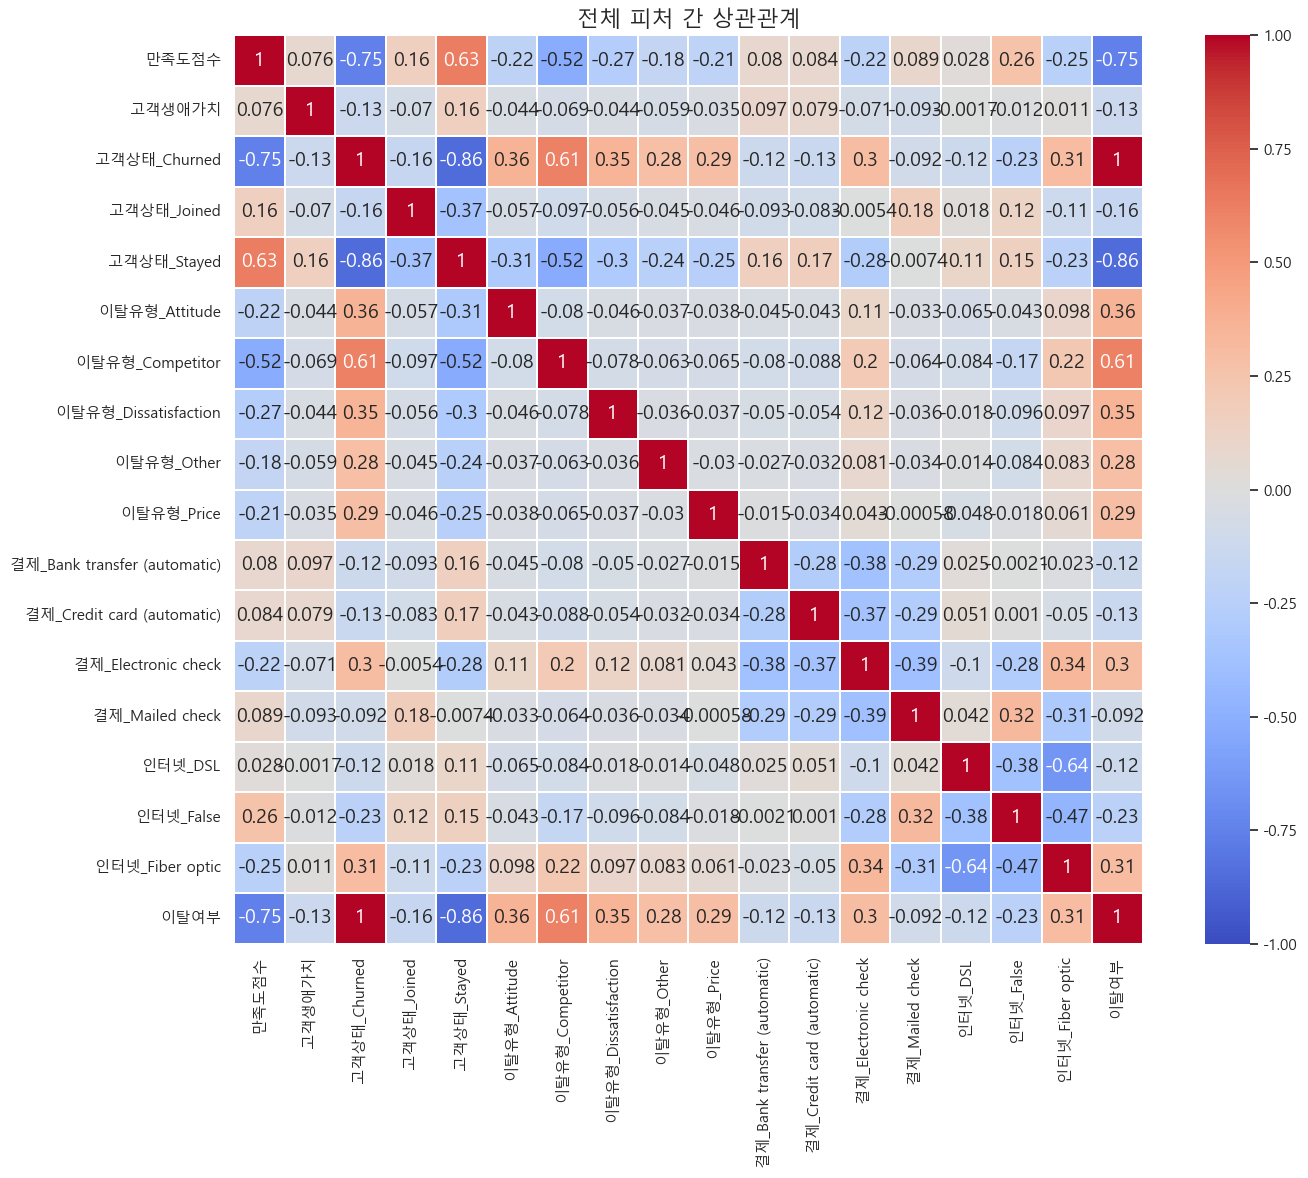

In [17]:
plt.figure(figsize=(15, 12))
sns.heatmap(
    corr_matrix,
    annot=True,           
    cmap='coolwarm',
    vmin=-1, vmax=1,
    square=True,
    linewidths=0.2
)
plt.title('전체 피처 간 상관관계', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### 너무 많아서 이탈여부 기준으로 상위 10개만 가져온다(절댓값으로)

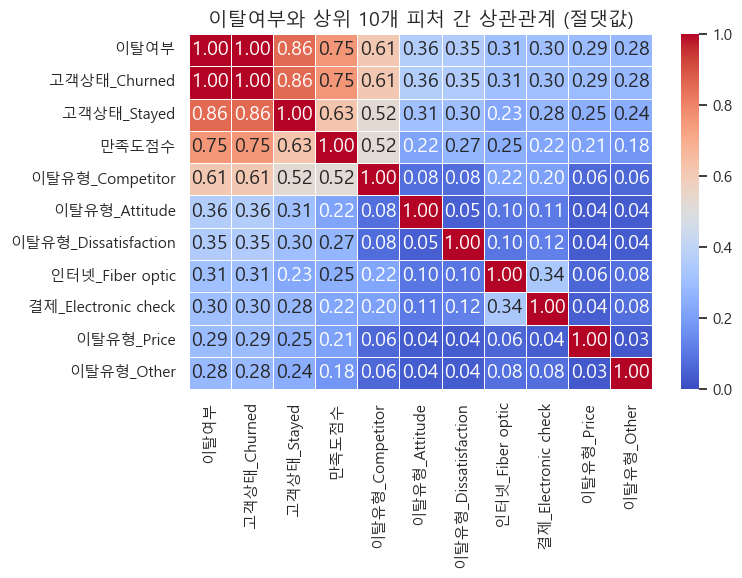

In [18]:
# 이탈여부와의 상관계수 절댓값 기준 내림차순 정렬
corr_with_churn = corr_matrix['이탈여부'].abs().sort_values(ascending=False)

# 상위 10개 이름 추출
top_feats = corr_with_churn.index[1:11].tolist()  # index[0]은 '이탈여부' 자신

# 부분 히트맵을 그릴 컬럼 리스트
selected_cols = ['이탈여부'] + top_feats

# 부분 히트맵 그리기 (절댓값 시각화)
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix.loc[selected_cols, selected_cols].abs(),
    annot=True, fmt=".2f",
    cmap='coolwarm',
    vmin=0, vmax=1,
    linewidths=0.5
)
plt.title('이탈여부와 상위 10개 피처 간 상관관계 (절댓값)', fontsize=14)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### 위에 두개의 히트맵으로 알 수 있는점 
- e-check를 사용하는 사람은 만족도가 낮은편이다(나머지는 +0.08정도로 엄청 소폭 만족도가 높다) 
- fiber optic 인터넷방식을 사용하는 고객은 다른 인터넷방식 사용자보다 만족도가 낮다
- 오히려 인터넷을 쓰지 않는 고객이 만족도가 높음(요금,충성도와 관련이 있을듯)
- 고객생애가치는 이탈여부에 크게 영향을 주지 못한다
- fiber optic 인터넷방식 사용자는 e-check를 주로 사용하는듯(둘다 이탈여부 0.3정도로 이탈위험이 있음, 저 둘 조합을 이용하는 고객에게 혜택이 필요할것 같다)


In [21]:
#merged.to_csv("merged(tel_data+status).csv", index=False, encoding="utf-8-sig", na_rep="NULL")